In [27]:
import requests 
import pandas as pd
import spacy
import geocoder
import numpy as np

nlp = spacy.load('en')
%matplotlib inline

In [47]:
import requests
r = requests.get('https://geodeepdive.org/api/snippets?term=NMNH%20USNM&fragment_limit=100&article_limit=30')
r.status_code

200

### Publishers

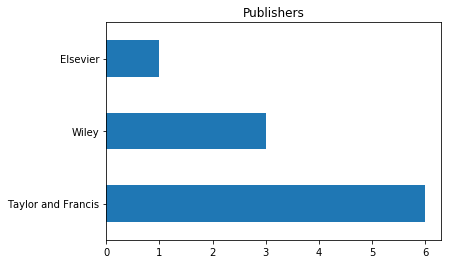

In [48]:
pubs = [i['publisher'] for i in r.json()['success']['data']]
pd.Series(pubs).value_counts().plot(kind='barh', title='Publishers')

### Journals

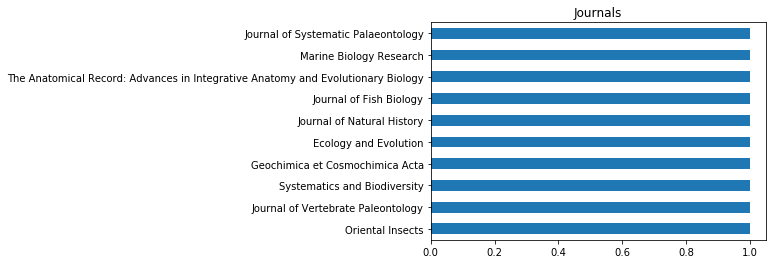

In [49]:
journ = [i['pubname'] for i in r.json()['success']['data']]
pd.Series(journ).value_counts().plot(kind='barh', title='Journals')

### Sentences

In [50]:
sentences = []
doc = []

for i in r.json()['success']['data']:
    for x in i['highlight']:
        if 'USNM' in x: 
            x = nlp(x)
            sentences.append(x)
            doc.append(i['title'])

In [51]:
sentences[1]

, Trelew; UMMZ, Museum of Zoology, University of Michigan, Ann Arbor; <em class="hl">NMNH</em> (<em class="hl">USNM</em>), National Museum

### Gather Locations

In [52]:
locations = []
pub = []

for idx, i in enumerate(sentences):
    for ent in i.ents:
        if ent.label_ == 'GPE': 
            locations.append(ent.text)
            pub.append(doc[idx])

In [53]:
locations[10], pub[10]

('NMNH</em',
 'Sound transmission in archaic and modern whales: Anatomical adaptations for underwater hearing')

In [54]:
geo = []
save_doc = []
for idx, i in enumerate(locations):
    g = geocoder.google(i).latlng
    if g != None:
        geo.append(g)
        save_doc.append(pub[idx])
        print(g, pub[idx])

[40.7642202, -73.9742747] First records of Fistularia petimba and Diodon eydouxii for the Azores, with notes on the occurrence of three additional species
[38.8912662, -77.0260654] First records of Fistularia petimba and Diodon eydouxii for the Azores, with notes on the occurrence of three additional species
[38.8859942, -77.0212813] First records of Fistularia petimba and Diodon eydouxii for the Azores, with notes on the occurrence of three additional species
[42.2808256, -83.7430378] Redescription of the Eocene catfish Bachmannia chubutensis (Teleostei: Bachmanniidae) of southern South America
[38.8912662, -77.0260654] Redescription of the Eocene catfish Bachmannia chubutensis (Teleostei: Bachmanniidae) of southern South America
[36.4603466, -94.1926429] Trapped noble gases in unequilibrated ordinary chondrites
[36.4603466, -94.1926429] Trapped noble gases in unequilibrated ordinary chondrites
[20.593684, 78.96288] Sound transmission in archaic and modern whales: Anatomical adaptatio

In [55]:
lat = []
long = []
for i in geo:
    lat.append(i[0])
    long.append(i[1])

In [56]:
df = pd.DataFrame({'lat':lat, 'long':long, 'pub':save_doc})
df.to_csv('BHL_gdd_experiment.csv')

#Thanks to Brandon Serna of the USGS for the code and tutorial to learn how to use the GDD API.